<a href="https://colab.research.google.com/github/pavel7479/For_resume/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%A0%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BF%D0%BE_%D0%B8%D0%BD%D1%81%D1%82%D1%80%D1%83%D0%BA%D1%86%D0%B8%D0%B8%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Трехбарьерный метод

Верхний горизонтальный барьер =  current_price + up_coef * current_price
Нижний горизонтальный барьер =  current_price - down_coef * current_price

current_price - текущая цена
up_coef, down_coef - положительные вещественные числа , начните со значений 0.02, задаются и подбираются Вами

Временной вертикальный барьер - задается и подбирается Вами , например, 30 минут


Label / предсказаение модели будет разделен на три категории:
-1 - первое что сделает цена это пересечет нижний барьер
0 - верхний и нижний барьер не будут пересечены за указанное время, будет пересечен временной барьер
+1 - первое что сделает цена это пересечет верхний барьер





Маркировка будет происходить в момент формирования дисбалансных свечей (сниматься лейблы на основе фич). Помните, что с сильным дисбалансом в классах ничего хорошего не получится.

Дисбалансную свечу будем формировать в момент, когда |buy_counts - sell_counts| > limit
buy_counts - количество сделок на покупку
sell_counts - количество сделок на продажу
limit - выбирается Вами , например, 500, то есть свеча будет сформирована когда количество покупок больше чем продаж на 500 или наоборот когда продаж больше на 500 чем покупок


Далее вы можете обучать ту модель , которая Вам больше нравится (например, градинтный бустинг или lstm). Фичи на основе потока сделок, сформированных свечей, прошлых предсказаний, составные какие-то выбирайте произвольно.

# Подготовка DataSet

In [ ]:
# Подключим google диск
from google.colab import files
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import tarfile
import gzip
import shutil

# Путь к загруженному файлу
tar_file = '/content/drive/MyDrive/data.practice.logs.tar.gz'

# Создаем директорию для распаковки
extract_dir = 'extracted_logs'
os.makedirs(extract_dir, exist_ok=True)

# Распаковка архива
with tarfile.open(tar_file) as tar:
    tar.extractall(path=extract_dir)

print("Архив распакован в директорию:", extract_dir)

Архив распакован в директорию: extracted_logs


In [ ]:

# Путь к каталогу, где находятся заархивированные файлы
input_directory = '/content/extracted_logs'

# Путь к директории, куда будут распакованы все файлы
output_directory = '/content/data_practice'
os.makedirs(output_directory, exist_ok=True)

# Проходимся по всем файлам в input_directory
for filename in os.listdir(input_directory):
    if filename.endswith('.log.gz'):
        file_path = os.path.join(input_directory, filename)

        # Путь к выходному файлу
        output_file_path = os.path.join(output_directory, filename[:-3])  # Убираем .gz

        # Распаковка gzip файла
        with gzip.open(file_path, 'rb') as f_in:
            with open(output_file_path, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)

print("Все файлы успешно распакованы в:", output_directory)

# Проверка содержимого выходной директории
print("Содержимое выходной директории:")
print(os.listdir(output_directory))



Все файлы успешно распакованы в: /content/data_practice
Содержимое выходной директории:
['2023-10-22_practice.log', '2023-10-30_practice.log', '2023-11-17_practice.log', '2023-11-16_practice.log', '2023-11-12_practice.log', '2023-10-03_practice.log', '2023-11-05_practice.log', '2023-11-09_practice.log', '2023-10-11_practice.log', '2023-10-18_practice.log', '2023-10-05_practice.log', '2023-11-15_practice.log', '2023-10-01_practice.log', '2023-11-08_practice.log', '2023-10-08_practice.log', '2023-10-09_practice.log', '2023-11-18_practice.log', '2023-10-20_practice.log', '2023-11-26_practice.log', '2023-11-21_practice.log', '2023-11-25_practice.log', '2023-11-07_practice.log', '2023-10-17_practice.log', '2023-11-10_practice.log', '2023-10-27_practice.log', '2023-10-28_practice.log', '2023-10-13_practice.log', '2023-10-07_practice.log', '2023-11-01_practice.log', '2023-10-26_practice.log', '2023-11-13_practice.log', '2023-11-28_practice.log', '2023-10-04_practice.log', '2023-10-24_practice

In [ ]:
# Смотритм содержимое файла
# Получение списка всех файлов в выходной директории

files = os.listdir(output_directory)
print("Список файлов в выходной директории:")
print(files)

# Открытие и чтение содержимого первого файла
if files:
    first_file_path = os.path.join(output_directory, files[0])
    print(f"\nСодержимое файла {files[0]}:\n")
    with open(first_file_path, 'r') as file:
        for _ in range(10):
            line = file.readline()
            if not line:
                break
            print(line.strip())
else:
    print("Выходная директория пуста.")


Список файлов в выходной директории:
['2023-10-22_practice.log', '2023-10-30_practice.log', '2023-11-17_practice.log', '2023-11-16_practice.log', '2023-11-12_practice.log', '2023-10-03_practice.log', '2023-11-05_practice.log', '2023-11-09_practice.log', '2023-10-11_practice.log', '2023-10-18_practice.log', '2023-10-05_practice.log', '2023-11-15_practice.log', '2023-10-01_practice.log', '2023-11-08_practice.log', '2023-10-08_practice.log', '2023-10-09_practice.log', '2023-11-18_practice.log', '2023-10-20_practice.log', '2023-11-26_practice.log', '2023-11-21_practice.log', '2023-11-25_practice.log', '2023-11-07_practice.log', '2023-10-17_practice.log', '2023-11-10_practice.log', '2023-10-27_practice.log', '2023-10-28_practice.log', '2023-10-13_practice.log', '2023-10-07_practice.log', '2023-11-01_practice.log', '2023-10-26_practice.log', '2023-11-13_practice.log', '2023-11-28_practice.log', '2023-10-04_practice.log', '2023-10-24_practice.log', '2023-10-06_practice.log', '2023-11-11_pract

In [ ]:
# Объединяем всё в одном файле
# Путь к директории, где находятся распакованные файлы

output_directory = '/content/data_practice'

# Путь к файлу, в который будем записывать информацию
output_file_path = '/content/combined_logs.txt'

# Открываем выходной файл для записи
with open(output_file_path, 'w') as output_file:

    # Получаем список всех файлов в выходной директории
    files = os.listdir(output_directory)

    # Проходимся по каждому файлу
    for filename in files:
        if filename.endswith('.log'):
            file_path = os.path.join(output_directory, filename)

            # Читаем содержимое файла и записываем его в общий файл
            with open(file_path, 'r') as input_file:
                output_file.write(f"=== Содержимое файла: {filename} ===\n")
                output_file.write(input_file.read())
                output_file.write("\n\n")  # Разделитель между файлами

print(f"Общая информация сохранена в файле: {output_file_path}")


Общая информация сохранена в файле: /content/combined_logs.txt


In [ ]:
# Смотрим содержимое
# Путь к файлу, который мы хотим прочитать

file_path = '/content/combined_logs.txt'

# Печатаем первые 10 строк файла
print("Первые 10 строк файла:")
with open(file_path, 'r') as file:
    for i, line in enumerate(file):
        if i < 10:
            print(line.strip())
        else:
            break

# Печатаем последние 10 строк файла
print("\nПоследние 10 строк файла:")
with open(file_path, 'r') as file:
    lines = file.readlines()
    for line in lines[-10:]:
        print(line.strip())


Первые 10 строк файла:
=== Содержимое файла: 2023-10-22_practice.log ===
28.11.2023 14:01:49.815150	[        ] 2023-10-22 00:00:03.277 BUY 8.796 2.7
28.11.2023 14:01:49.815167	[        ] 2023-10-22 00:00:03.297 SELL 8.795 0.1
28.11.2023 14:01:49.815177	[        ] 2023-10-22 00:00:03.333 BUY 8.796 90.3
28.11.2023 14:01:49.815181	[        ] 2023-10-22 00:00:03.415 BUY 8.796 31
28.11.2023 14:01:49.815184	[        ] 2023-10-22 00:00:03.415 BUY 8.796 1.1
28.11.2023 14:01:49.815186	[        ] 2023-10-22 00:00:03.415 BUY 8.796 9.2
28.11.2023 14:01:49.815197	[        ] 2023-10-22 00:00:03.570 SELL 8.795 2.7
28.11.2023 14:01:49.815219	[        ] 2023-10-22 00:00:03.850 SELL 8.795 0.1
28.11.2023 14:01:49.815250	[        ] 2023-10-22 00:00:04.134 SELL 8.795 4.1

Последние 10 строк файла:
28.11.2023 14:02:01.666751	[        ] 2023-10-21 23:59:57.937 BUY 8.795 122.5
28.11.2023 14:02:01.666760	[        ] 2023-10-21 23:59:57.937 BUY 8.795 757.8
28.11.2023 14:02:01.666793	[        ] 2023-10-21 23:59:5

In [ ]:
# Переносим все данные в один файл
# Путь к файлу, который мы хотим обработать
file_path = '/content/combined_logs.txt'

# Создаем временный файл для записи обработанных строк
output_file_path = '/content/processed_logs.txt'

# Открываем файлы для чтения и записи
with open(file_path, 'r') as input_file, open(output_file_path, 'w') as output_file:
    for line in input_file:
        # Находим позицию открывающейся скобки '['
        start_index = line.find('[')
        if start_index != -1:
            # Находим позицию закрывающейся скобки ']'
            end_index = line.find(']', start_index)
            if end_index != -1:
                # Обрезаем строку, удаляя все символы от '[' до ']' включительно
                processed_line = line[end_index + 1:].strip()
                # Записываем обработанную строку в выходной файл
                output_file.write(processed_line + '\n')

print(f"Обработанные данные сохранены в файле: {output_file_path}")

Обработанные данные сохранены в файле: /content/processed_logs.txt


In [ ]:
# Смотрим содержимое
# Путь к файлу, который мы хотим прочитать

file_path = '/content/processed_logs.txt'

# Печатаем первые 10 строк файла
print("Первые 10 строк файла:")
with open(file_path, 'r') as file:
    for i, line in enumerate(file):
        if i < 10:
            print(line.strip())
        else:
            break

# Печатаем последние 10 строк файла
print("\nПоследние 10 строк файла:")
with open(file_path, 'r') as file:
    lines = file.readlines()
    for line in lines[-10:]:
        print(line.strip())

Первые 10 строк файла:
2023-10-22 00:00:03.277 BUY 8.796 2.7
2023-10-22 00:00:03.297 SELL 8.795 0.1
2023-10-22 00:00:03.333 BUY 8.796 90.3
2023-10-22 00:00:03.415 BUY 8.796 31
2023-10-22 00:00:03.415 BUY 8.796 1.1
2023-10-22 00:00:03.415 BUY 8.796 9.2
2023-10-22 00:00:03.570 SELL 8.795 2.7
2023-10-22 00:00:03.850 SELL 8.795 0.1
2023-10-22 00:00:04.134 SELL 8.795 4.1
2023-10-22 00:00:04.321 SELL 8.795 2.9

Последние 10 строк файла:
2023-10-21 23:59:57.937 BUY 8.795 16.9
2023-10-21 23:59:57.937 BUY 8.795 160.7
2023-10-21 23:59:57.937 BUY 8.795 122.5
2023-10-21 23:59:57.937 BUY 8.795 757.8
2023-10-21 23:59:58.083 SELL 8.794 0.1
2023-10-21 23:59:58.196 BUY 8.795 27
2023-10-21 23:59:58.989 SELL 8.794 0.1
2023-10-21 23:59:59.243 BUY 8.795 128.8
2023-10-21 23:59:59.243 BUY 8.795 60
2023-10-21 23:59:59.579 SELL 8.794 0.1


In [ ]:
# Сохраним файл на Google Диск
file_to_save = '/content/processed_logs.txt'

# Путь к папке на Google Диске, куда мы хотим сохранить файл
save_folder = '/content/drive/MyDrive/'

# Копируем файл на Google Диск
!cp {file_to_save} {save_folder}

In [ ]:
# Перобразум в DataFrame (отсюда запускаем если вылетим из Google Colub)
import pandas as pd
from datetime import datetime

# Путь к файлу с обработанными данными
file_path = '/content/processed_logs.txt'

# Считываем данные из файла в DataFrame Pandas
columns = ['Date', 'Time', 'Action', 'Price', 'Volume']
data = []

with open(file_path, 'r') as file:
    for line in file:
        parts = line.split()
        date_str = parts[0]
        time_str = parts[1]
        action = parts[2]
        price = float(parts[3])
        volume = float(parts[4])

        # Добавляем данные в список
        data.append([date_str, time_str, action, price, volume])

df = pd.DataFrame(data, columns=columns)

# Выводим содержимое таблицы
print("Таблица с данными:")
print(df)

Таблица с данными:
                Date          Time Action  Price  Volume
0         2023-10-22  00:00:03.277    BUY  8.796     2.7
1         2023-10-22  00:00:03.297   SELL  8.795     0.1
2         2023-10-22  00:00:03.333    BUY  8.796    90.3
3         2023-10-22  00:00:03.415    BUY  8.796    31.0
4         2023-10-22  00:00:03.415    BUY  8.796     1.1
...              ...           ...    ...    ...     ...
19541285  2023-10-21  23:59:58.196    BUY  8.795    27.0
19541286  2023-10-21  23:59:58.989   SELL  8.794     0.1
19541287  2023-10-21  23:59:59.243    BUY  8.795   128.8
19541288  2023-10-21  23:59:59.243    BUY  8.795    60.0
19541289  2023-10-21  23:59:59.579   SELL  8.794     0.1

[19541290 rows x 5 columns]


In [ ]:
# Сортируем по дате и времени
import pandas as pd
# Преобразуем столбцы Date и Time в формат datetime
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Сортируем DataFrame по столбцу DateTime
df_sorted = df.sort_values(by='DateTime').reset_index(drop=True)

df_sorted

,Date,Time,Action,Price,Volume,DateTime
0,2023-10-01,00:00:07.795,BUY,8.153,0.3,2023-10-01 00:00:07.795
1,2023-10-01,00:00:17.018,BUY,8.154,3.5,2023-10-01 00:00:17.018
2,2023-10-01,00:00:17.018,BUY,8.154,12.3,2023-10-01 00:00:17.018
3,2023-10-01,00:00:17.137,SELL,8.153,1.3,2023-10-01 00:00:17.137
4,2023-10-01,00:00:17.152,BUY,8.154,15.9,2023-10-01 00:00:17.152
...,...,...,...,...,...,...
19541285,2023-11-28,14:07:48.721,SELL,14.170,1.3,2023-11-28 14:07:48.721
19541286,2023-11-28,14:07:48.721,SELL,14.170,3.5,2023-11-28 14:07:48.721
19541287,2023-11-28,14:07:48.721,SELL,14.170,3.7,2023-11-28 14:07:48.721
19541288,2023-11-28,14:07:48.730,SELL,14.170,0.7,2023-11-28 14:07:48.730


In [ ]:
# Убираем столбец DateTime, он больше не нужен
del df_sorted['DateTime']
df_sorted

,Date,Time,Action,Price,Volume
0,2023-10-01,00:00:07.795,BUY,8.153,0.3
1,2023-10-01,00:00:17.018,BUY,8.154,3.5
2,2023-10-01,00:00:17.018,BUY,8.154,12.3
3,2023-10-01,00:00:17.137,SELL,8.153,1.3
4,2023-10-01,00:00:17.152,BUY,8.154,15.9
...,...,...,...,...,...
19541285,2023-11-28,14:07:48.721,SELL,14.170,1.3
19541286,2023-11-28,14:07:48.721,SELL,14.170,3.5
19541287,2023-11-28,14:07:48.721,SELL,14.170,3.7
19541288,2023-11-28,14:07:48.730,SELL,14.170,0.7


In [ ]:
# Сохранение файла готового к проекту

# Сохранение в CSV файл
csv_file_path = '/content/data.csv'
df_sorted.to_csv(csv_file_path, index=False)

print(f"DataFrame сохранен в файл {csv_file_path}")


DataFrame сохранен в файл /content/data.csv


In [ ]:
# @title Сохраним файл на Google Диск

file_to_save = '/content/data.csv'

# Путь к папке на Google Диске, куда мы хотим сохранить файл
save_folder = '/content/drive/MyDrive/'

# Копируем файл на Google Диск
!cp {file_to_save} {save_folder}

# Обучение

In [ ]:
# Подключим google диск
from google.colab import files
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Загрузка данных в DataFrame если вылетили из Google Colub, то указываем путь к Google диску!
df = pd.read_csv('/content/data.csv')

# Просмотр данных
print(df.head()) # Данные отсортированы

         Date          Time Action  Price  Volume
0  2023-10-01  00:00:07.795    BUY  8.153     0.3
1  2023-10-01  00:00:17.018    BUY  8.154     3.5
2  2023-10-01  00:00:17.018    BUY  8.154    12.3
3  2023-10-01  00:00:17.137   SELL  8.153     1.3
4  2023-10-01  00:00:17.152    BUY  8.154    15.9


In [ ]:
print(df.dtypes)

Date       object
Time       object
Action     object
Price     float64
Volume    float64
dtype: object


In [ ]:
!pip install mplfinance

In [ ]:
import pandas as pd

# Объединяем столбцы Date и Time в один столбец DateTime и преобразуем в формат datetime
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Подбираемые параметры
limit = 500

# Функция для создания дисбалансных свечей с сохранением временных меток
def create_imbalanced_candles(df, limit):
    candles = []
    buy_count = 0
    sell_count = 0
    open_price = None
    high_price = None
    low_price = None
    close_price = None
    open_time = None
    close_time = None

    for index, row in df.iterrows():
        if row['Action'] == 'BUY':
            buy_count += 1
        else:
            sell_count += 1

        if open_price is None:
            open_price = row['Price']
            high_price = row['Price']
            low_price = row['Price']
            open_time = row['DateTime']

        high_price = max(high_price, row['Price'])
        low_price = min(low_price, row['Price'])
        close_price = row['Price']
        close_time = row['DateTime']

        if abs(buy_count - sell_count) > limit:
            candles.append([open_price, high_price, low_price, close_price, open_time, close_time])
            buy_count = 0
            sell_count = 0
            open_price = None
            open_time = None

    return pd.DataFrame(candles, columns=['open', 'high', 'low', 'close', 'DateTimeOpen', 'DateTimeClose'])

candles_df = create_imbalanced_candles(df, limit)

# Выводим результат
print(candles_df)

        open    high     low   close            DateTimeOpen  \
0      8.153   8.164   8.108   8.110 2023-10-01 00:00:07.795   
1      8.108   8.151   8.100   8.151 2023-10-01 00:42:12.552   
2      8.151   8.209   8.143   8.148 2023-10-01 01:10:09.841   
3      8.148   8.238   8.146   8.238 2023-10-01 02:08:25.843   
4      8.238   8.265   8.236   8.263 2023-10-01 03:36:21.603   
...      ...     ...     ...     ...                     ...   
6594  14.009  14.030  13.926  13.936 2023-11-28 10:54:11.607   
6595  13.936  14.076  13.905  14.076 2023-11-28 11:56:47.400   
6596  14.075  14.128  14.074  14.121 2023-11-28 12:39:24.539   
6597  14.121  14.122  14.120  14.120 2023-11-28 12:42:49.101   
6598  14.122  14.184  14.078  14.184 2023-11-28 12:42:49.109   

               DateTimeClose  
0    2023-10-01 00:42:12.550  
1    2023-10-01 01:10:09.833  
2    2023-10-01 02:08:25.843  
3    2023-10-01 03:36:21.603  
4    2023-10-01 03:36:21.624  
...                      ...  
6594 2023-11-2

In [ ]:
print(candles_df.dtypes)

open                    float64
high                    float64
low                     float64
close                   float64
DateTimeOpen     datetime64[ns]
DateTimeClose    datetime64[ns]
dtype: object


In [ ]:
# Сохранение файла готового к проекту

# Сохранение в CSV файл
csv_file_path = '/content/candles_df500.csv'
candles_df.to_csv(csv_file_path, index=False)

print(f"DataFrame сохранен в файл {csv_file_path}")

DataFrame сохранен в файл /content/candles_df500.csv


In [ ]:
import pandas as pd

# Загрузка данных в DataFrame если вышибло из Google colub то загружеам с Google диска
candles_df = pd.read_csv('/content/candles_df500.csv')

# Просмотр данных
print(candles_df.head()) # Данные отсортированы

    open   high    low  close             DateTimeOpen  \
0  8.153  8.164  8.108  8.110  2023-10-01 00:00:07.795   
1  8.108  8.151  8.100  8.151  2023-10-01 00:42:12.552   
2  8.151  8.209  8.143  8.148  2023-10-01 01:10:09.841   
3  8.148  8.238  8.146  8.238  2023-10-01 02:08:25.843   
4  8.238  8.265  8.236  8.263  2023-10-01 03:36:21.603   

             DateTimeClose  
0  2023-10-01 00:42:12.550  
1  2023-10-01 01:10:09.833  
2  2023-10-01 02:08:25.843  
3  2023-10-01 03:36:21.603  
4  2023-10-01 03:36:21.624  


In [ ]:
candles_df

,open,high,low,close,DateTimeOpen,DateTimeClose
0,8.153,8.164,8.108,8.110,2023-10-01 00:00:07.795,2023-10-01 00:42:12.550
1,8.108,8.151,8.100,8.151,2023-10-01 00:42:12.552,2023-10-01 01:10:09.833
2,8.151,8.209,8.143,8.148,2023-10-01 01:10:09.841,2023-10-01 02:08:25.843
3,8.148,8.238,8.146,8.238,2023-10-01 02:08:25.843,2023-10-01 03:36:21.603
4,8.238,8.265,8.236,8.263,2023-10-01 03:36:21.603,2023-10-01 03:36:21.624
...,...,...,...,...,...,...
6594,14.009,14.030,13.926,13.936,2023-11-28 10:54:11.607,2023-11-28 11:56:47.400
6595,13.936,14.076,13.905,14.076,2023-11-28 11:56:47.400,2023-11-28 12:39:22.667
6596,14.075,14.128,14.074,14.121,2023-11-28 12:39:24.539,2023-11-28 12:42:49.101
6597,14.121,14.122,14.120,14.120,2023-11-28 12:42:49.101,2023-11-28 12:42:49.109


In [ ]:
# @title Строим график на основе candles_df
import mplfinance as mpf

# Преобразование столбцов в тип datetime
candles_df['DateTimeOpen'] = pd.to_datetime(candles_df['DateTimeOpen'])

# Преобразование столбца DateTimeOpen в индекс
candles_df.set_index('DateTimeOpen', inplace=True)

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


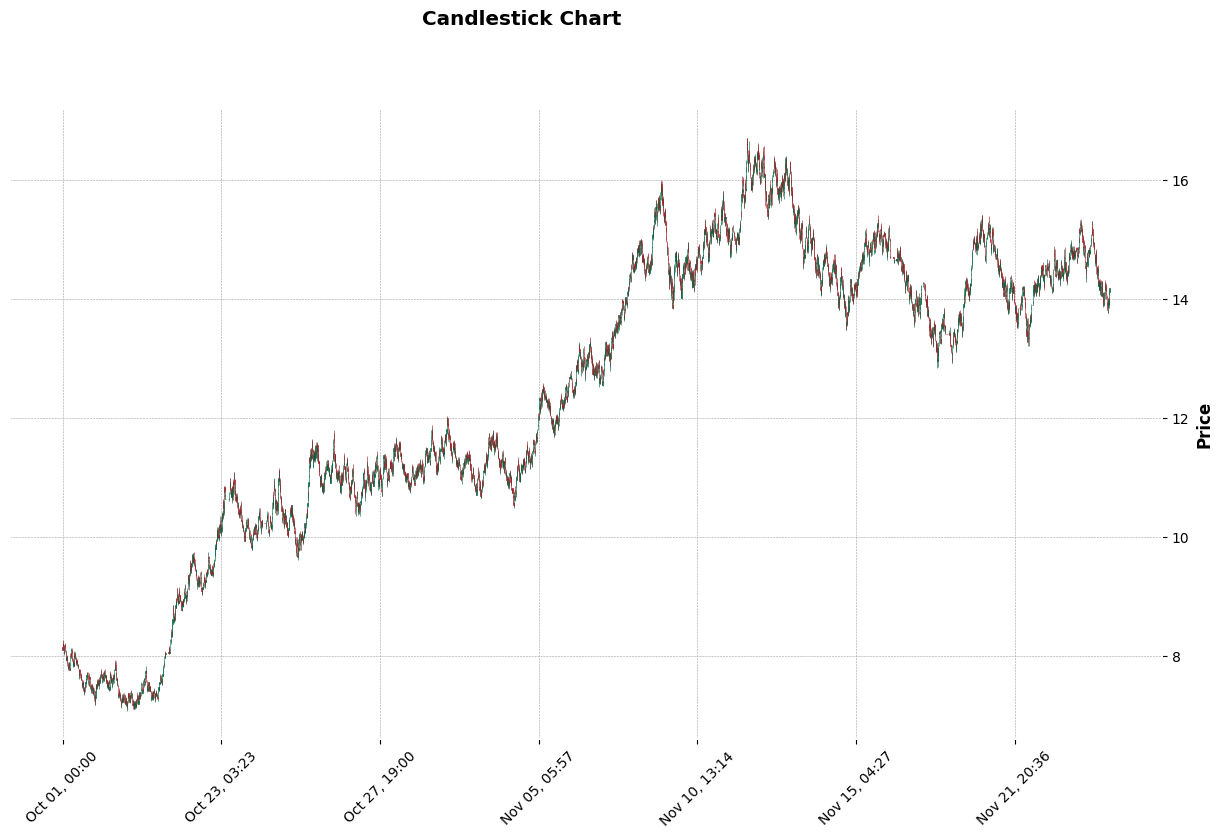

In [ ]:
# Построение графика свечей
import matplotlib.pyplot as plt

mpf.plot(candles_df, type='candle', style='charles', title='Candlestick Chart', ylabel='Price', figsize=(16, 9))
plt.show()

In [ ]:
print(candles_df.columns)

Index(['open', 'high', 'low', 'close', 'DateTimeClose'], dtype='object')


In [ ]:
# Ставим метки

# Подбираемые параметры
up_coef = 0.02
down_coef = 0.030
holding_period = pd.Timedelta(minutes=240)


def label_candles(candles_df, up_coef, down_coef, holding_period):
    labels = []
    for i in range(len(candles_df)):
        current_price = candles_df['close'].iloc[i]
        upper_barrier = current_price * (1 + up_coef)
        lower_barrier = current_price * (1 - down_coef)
        end_time = candles_df.index[i] + holding_period

        label = 0
        for j in range(i + 1, len(candles_df)):
            if candles_df.index[j] > end_time:
                break
            if candles_df['high'].iloc[j] >= upper_barrier:
                label = 1
                break
            if candles_df['low'].iloc[j] <= lower_barrier:
                label = -1
                break

        labels.append(label)

    candles_df['label'] = labels
    return candles_df

In [ ]:
labeled_candles_df = label_candles(candles_df, up_coef, down_coef, holding_period)
labeled_candles_df

,open,high,low,close,DateTimeClose,label
DateTimeOpen,,,,,,
2023-10-01 00:00:07.795,8.153,8.164,8.108,8.110,2023-10-01 00:42:12.550,0
2023-10-01 00:42:12.552,8.108,8.151,8.100,8.151,2023-10-01 01:10:09.833,0
2023-10-01 01:10:09.841,8.151,8.209,8.143,8.148,2023-10-01 02:08:25.843,0
2023-10-01 02:08:25.843,8.148,8.238,8.146,8.238,2023-10-01 03:36:21.603,0
2023-10-01 03:36:21.603,8.238,8.265,8.236,8.263,2023-10-01 03:36:21.624,0
...,...,...,...,...,...,...
2023-11-28 10:54:11.607,14.009,14.030,13.926,13.936,2023-11-28 11:56:47.400,0
2023-11-28 11:56:47.400,13.936,14.076,13.905,14.076,2023-11-28 12:39:22.667,0
2023-11-28 12:39:24.539,14.075,14.128,14.074,14.121,2023-11-28 12:42:49.101,0


In [ ]:
value_counts = labeled_candles_df['label'].value_counts(dropna=False)
print(value_counts)

label
 1    2789
 0    2559
-1    1251
Name: count, dtype: int64


In [ ]:
# @title Обучение модели на основе Градиентного бустинга

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Подготовка данных для модели
features = labeled_candles_df[['open', 'high', 'low', 'close']]
labels = labeled_candles_df['label']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Обучение модели
model = GradientBoostingClassifier()
history = model.fit(X_train, y_train)

# Оценка модели
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.52      0.14      0.22       240
           0       0.57      0.56      0.57       543
           1       0.52      0.70      0.60       537

    accuracy                           0.54      1320
   macro avg       0.54      0.47      0.46      1320
weighted avg       0.54      0.54      0.52      1320



Epoch 1/50
165/165 [==============================] - 23s 116ms/step - loss: 1.0244 - accuracy: 0.4573 - val_loss: 1.0082 - val_accuracy: 0.4635
Epoch 2/50
165/165 [==============================] - 18s 110ms/step - loss: 1.0061 - accuracy: 0.4767 - val_loss: 0.9861 - val_accuracy: 0.4954
Epoch 3/50
165/165 [==============================] - 28s 168ms/step - loss: 1.0019 - accuracy: 0.4665 - val_loss: 0.9801 - val_accuracy: 0.4878
Epoch 4/50
165/165 [==============================] - 21s 124ms/step - loss: 0.9977 - accuracy: 0.4839 - val_loss: 0.9744 - val_accuracy: 0.5129
Epoch 5/50
165/165 [==============================] - 20s 119ms/step - loss: 0.9974 - accuracy: 0.4725 - val_loss: 0.9812 - val_accuracy: 0.4916
Epoch 6/50
165/165 [==============================] - 20s 120ms/step - loss: 0.9964 - accuracy: 0.4798 - val_loss: 0.9709 - val_accuracy: 0.5296
Epoch 7/50
165/165 [==============================] - 12s 75ms/step - loss: 0.9929 - accuracy: 0.4898 - val_loss: 0.9709 - val_acc

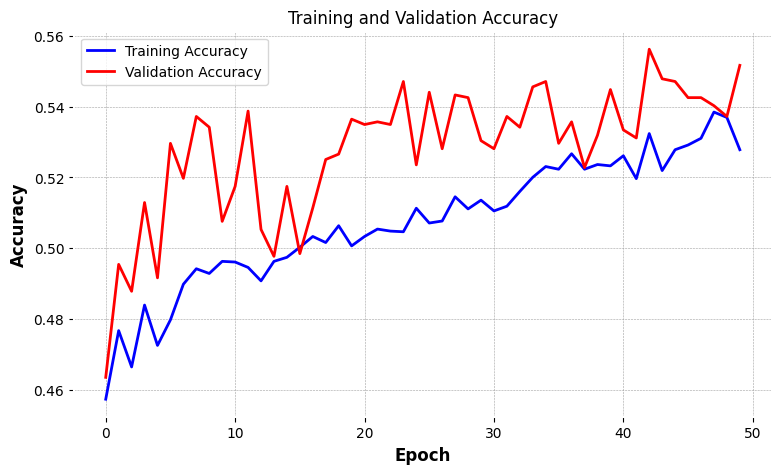

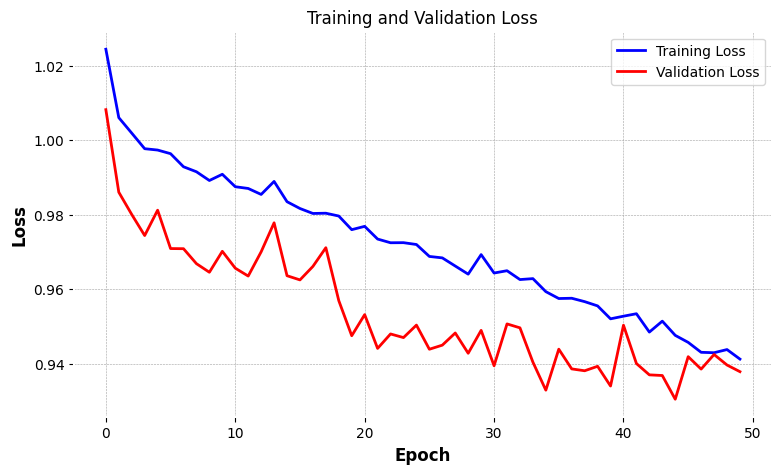

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Предобработка данных
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)  # Нормализация признаков

# Создание последовательностей для LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(labels[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 20  # Длина последовательности, например, последние 20 свечей
X_seq, y_seq = create_sequences(scaled_features, seq_length)

# Разделение на обучающий и тестовый наборы
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Преобразование целевых меток в one-hot формат
from keras.utils import to_categorical
y_train_seq_cat = to_categorical(y_train_seq + 1)  # +1 чтобы сделать классы 0, 1, 2
y_test_seq_cat = to_categorical(y_test_seq + 1)

# Создание модели LSTM для многоклассовой классификации
model = Sequential()
model.add(LSTM(units=160, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train_seq, y_train_seq_cat, epochs=50, batch_size=32, validation_data=(X_test_seq, y_test_seq_cat))

# Оценка модели
y_pred_proba = model.predict(X_test_seq)
y_pred_seq = np.argmax(y_pred_proba, axis=1) - 1  # Преобразование обратно к классам -1, 0, 1

print(classification_report(y_test_seq, y_pred_seq))

# График точности обучения и валидации
plt.figure(figsize=(9, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# График функции потерь обучения и валидации
plt.figure(figsize=(9, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Выводы:**
Представлены саме лучшие результаты. Менял параметры такие как limit, up_coef, down_coef и holding_period. Лучший результат показа сеть Градиентного Бустинга. Плохо определяет движение вниз (-1) много ложных срабатываний